# Import Libraries

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import pickle
import warnings
warnings.filterwarnings("ignore")

import spacy 
nlp = spacy.load('en_core_web_sm')  
from nltk import word_tokenize
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words("english"))
from wordcloud import WordCloud
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, KFold,cross_val_score,GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.metrics.pairwise import pairwise_distances

# Read dataset

In [2]:
# Read the csv dataset file
df=pd.read_csv('sample30.csv')

In [3]:
# Display top 5 rows of dataframe
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [4]:
#Check Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [5]:
#Check shape of dataset
df.shape

(30000, 15)

<b>Observation:</b></br> From the above dataset, we can see lot of Null values and some redundant columns which are not useful for the Analysis. we can remove them in later stages.

# Data Cleaning

In [6]:
# Checking Null values
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

<b>Observation:</b></br>Based on above,'reviews_userProvince', 'reviews_userCity', 'reviews_didPurchase ' columns has most of the nullvalues and these columns are not useful for the Analysis.

In [7]:
#Drop 'reviews_userProvince', 'reviews_userCity', 'reviews_userProvince' columns
df.drop(['reviews_userProvince', 'reviews_userCity', 'reviews_didPurchase'],axis=1,inplace=True)

In [8]:
# Checking Null values again
df.isnull().sum()

id                        0
brand                     0
categories                0
manufacturer            141
name                      0
reviews_date             46
reviews_doRecommend    2570
reviews_rating            0
reviews_text              0
reviews_title           190
reviews_username         63
user_sentiment            1
dtype: int64

In [9]:
# Check reviews_doRecommend
df.reviews_doRecommend.value_counts()

True     25880
False     1550
Name: reviews_doRecommend, dtype: int64

<b>Observation:</b></br> The 'reviews_doRecommend' column has mostly true values which is not useful for the analysis.

In [10]:
# Drop reviews_doRecommend column
df.drop(['reviews_doRecommend'],axis=1,inplace=True)

In [11]:
# Checking Null values again
df.isnull().sum()

id                    0
brand                 0
categories            0
manufacturer        141
name                  0
reviews_date         46
reviews_rating        0
reviews_text          0
reviews_title       190
reviews_username     63
user_sentiment        1
dtype: int64

In [12]:
# Check the row that has user_sentiment as Null
df[df.user_sentiment.isna()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2014-11-07T00:00:00.000Z,5,my kids absolutely loved this film so much tha...,a super hit with my children. they loved it!!??,7.87E+11,NaN


In [13]:
print("Review Text ",df[df.user_sentiment.isna()]['reviews_text'])
print('-----------')
print("Review Title ",df[df.user_sentiment.isna()]['reviews_title'])

Review Text  28354    my kids absolutely loved this film so much tha...
Name: reviews_text, dtype: object
-----------
Review Title  28354    a super hit with my children. they loved it!!??
Name: reviews_title, dtype: object


<b>Observation</b></br>From the above, it is clear that the sentiment is positive for the missing value. We can update the null value with positive sentiment.

In [14]:
# Update the user_sentiment for missing value
df.user_sentiment.fillna('Positive',inplace=True)

In [15]:
# Checking Null values again
df.isnull().sum()

id                    0
brand                 0
categories            0
manufacturer        141
name                  0
reviews_date         46
reviews_rating        0
reviews_text          0
reviews_title       190
reviews_username     63
user_sentiment        0
dtype: int64

In [16]:
# Drop null values for reviews_title
df_clean=df[~df.reviews_title.isna()]
# Drop null values for reviews_username
df_clean=df_clean[~df_clean.reviews_username.isna()]

In [17]:
# Drop categories, manufacturer & reviews_date columns as they are not needed for analysis
df_clean.drop(['categories','manufacturer','reviews_date'],axis=1,inplace=True)

In [18]:
# Checking Null values again
df_clean.isnull().sum()

id                  0
brand               0
name                0
reviews_rating      0
reviews_text        0
reviews_title       0
reviews_username    0
user_sentiment      0
dtype: int64

In [19]:
#Check shape
df_clean.shape

(29748, 8)

# Exploratory Data Analysis

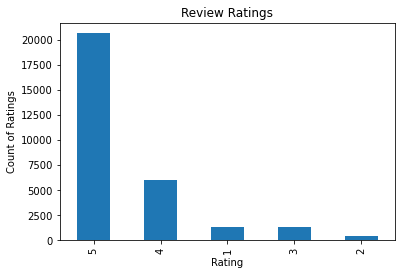

In [20]:
# Plot reviews_rating 
df_clean['reviews_rating'].value_counts().plot(kind='bar')
plt.title("Review Ratings")
plt.xlabel("Rating")
plt.ylabel("Count of Ratings")
plt.show()

<b>Observation</b></br>From above figure , it is clear that most of the people give rating 5 followed by rating 4.

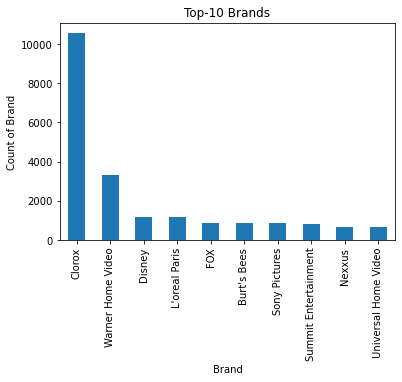

In [21]:
# Plot Brands 
df_clean['brand'].value_counts()[:10].plot(kind='bar')
plt.title("Top-10 Brands")
plt.xlabel("Brand")
plt.ylabel("Count of Brand")
plt.show()

<b>Observation</b></br> From the above figure, Clorox is the brand which is purchased by most number of people.

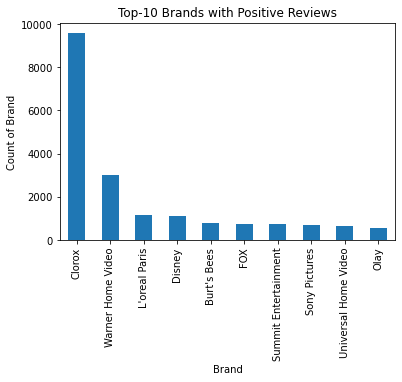

In [22]:
# Plot Brands 
df_clean[df_clean.user_sentiment=='Positive']['brand'].value_counts()[:10].plot(kind='bar')
plt.title("Top-10 Brands with Positive Reviews")
plt.xlabel("Brand")
plt.ylabel("Count of Brand")
plt.show()

<b>Observation</b></br>From the above figure, it is clear that the brand Clorox is having the highest number of positive reviews.

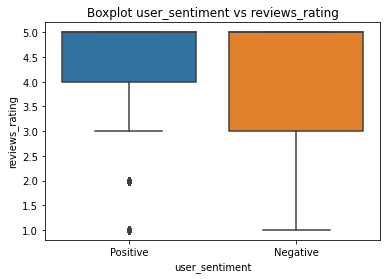

In [23]:
# Plot boxplot between user_sentiment & review_rating
sns.boxplot(data=df_clean,x='user_sentiment',y='reviews_rating')
plt.xlabel('user_sentiment')
plt.ylabel('reviews_rating')
plt.title("Boxplot user_sentiment vs reviews_rating")
plt.show()

<b>Observation</b></br>From the above boxplot , we can see there are some outliers in the positive reviews where the ratings are given low .

# Pre-processing

In [24]:
# copy dataframe for pre-processing
df_proc = df_clean.copy()

In [25]:
# Combining reviews_text and reviews_title to make final_reviews
df_proc['final_review']=df_proc['reviews_text']+" "+df_proc['reviews_title']
#Drop reviews_text & reviews_title columns
df_proc.drop(['reviews_text','reviews_title'],axis=1,inplace=True)

In [26]:
# Converting all columns to string
for col in df_proc.columns:
    df_proc[col]=df_proc[col].astype(str)

In [27]:
# Crate new sentiment_label to map categorical sentiment to integers
df_proc['sentiment_label']=df_proc['user_sentiment'].map({"Positive":1,"Negative":0})

In [28]:
# Check shape
df_proc.shape

(29748, 8)

In [29]:
# Create dataframe with required field for Sentiment Analysis
df_snmt=df_proc[['id','name','final_review','sentiment_label']]

In [30]:
df_snmt

,id,name,final_review,sentiment_label
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,1
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,1
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. Good,1
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,I read through the reviews on here before look...,0
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel cau...,0
...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,I got this conditioner with Influenster to try...,1
29996,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,"I love it , I received this for review purpose...",1
29997,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,First of all I love the smell of this product....,1
29998,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,I received this through Influenster and will n...,1


In [31]:
def clean_texts(text):
    #Make the text lowercase
    text=text.lower()
    #Remove text in square brackets
    text=re.sub(r'\[.*?\]','',text)
    #Remove punctuation
    text=re.sub(r'[^\w\s]', '', text)
    #Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
    return text

In [32]:
df_snmt['cleaned_reviews']=df_snmt['final_review'].apply(clean_texts)

In [33]:
def clean_stopwords(text):
    words=word_tokenize(text)
    text=" ".join([word for word in words if word not in stopwords_set])
    return text

In [34]:
df_snmt['cleaned_reviews']=df_snmt['cleaned_reviews'].apply(clean_stopwords)

In [35]:
df_snmt

,id,name,final_review,sentiment_label,cleaned_reviews
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,1,love album good hip hop side current pop sound...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,1,good flavor review collected part promotion good
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. Good,1,good flavor good
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,I read through the reviews on here before look...,0,read reviews looking buying one couples lubric...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel cau...,0,husband bought gel us gel caused irritation fe...
...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,I got this conditioner with Influenster to try...,1,got conditioner influenster try im loving far ...
29996,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,"I love it , I received this for review purpose...",1,love received review purposes influenster leav...
29997,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,First of all I love the smell of this product....,1,first love smell product wash hair smooth easy...
29998,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,I received this through Influenster and will n...,1,received influenster never go back anything el...


In [36]:
def lammetize_text(text):
    lemma_list=[]
    doc=nlp(text)
    for word in doc:
        lemma_list.append(word.lemma_)
    return " ".join(lemma_list)

In [37]:
df_snmt['lemmatized_reviews']=df_snmt['cleaned_reviews'].apply(lammetize_text)

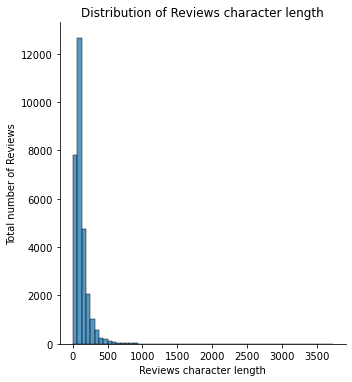

In [38]:
# Visualizing 'reviews_lemmatized' character length
character_length = [len(each_sent) for each_sent in df_snmt['lemmatized_reviews']]

sns.displot(character_length, kind='hist', bins=60)
plt.xlabel("Reviews character length")
plt.ylabel("Total number of Reviews")
plt.title("Distribution of Reviews character length")
plt.show()


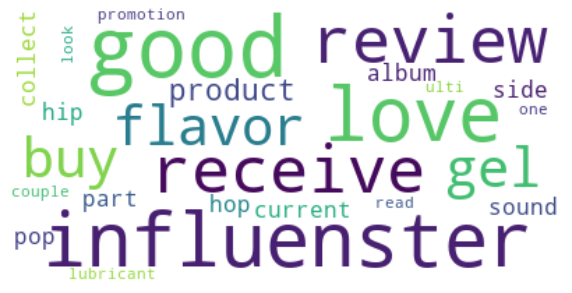

In [39]:
#Using a word cloud visualize the top 25 words
wordcloud = WordCloud(max_font_size=60, max_words=25, 
                      background_color="white", random_state=42).generate(str(df_snmt['lemmatized_reviews']))
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Feature Extraction

In [230]:
# Tfidf vectorization
tfidf = TfidfVectorizer(min_df=5, max_df=0.95, stop_words='english')
X = tfidf.fit_transform(df_snmt['lemmatized_reviews'])
y= df_snmt['sentiment_label']

In [41]:
# split dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [42]:
print("Train shapes:", X_train.shape)
print("Test shapes:", X_test.shape)

Train shapes: (23798, 4275)
Test shapes: (5950, 4275)


In [43]:
#Check user_sentiment column
df_snmt['sentiment_label'].value_counts(normalize=True)

1    0.887892
0    0.112108
Name: sentiment_label, dtype: float64

<b>Observation</b></br>From the above, it is clear that 89% of the samples have positive review and there is a clear class imbalance

In [44]:
# Perform Class-balancing using SMOTE
counter = Counter(y_train)
print("Before class imbalance", counter)

#oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)

counter = Counter(y_train_sm)
print("After class imbalance", counter)

Before class imbalance Counter({1: 21098, 0: 2700})
After class imbalance Counter({1: 21098, 0: 21098})


In [45]:
type(X_train_sm)

scipy.sparse.csr.csr_matrix

# Model Building

In [46]:
# Will create a function and call it again and again for different models
def evaluation_metrics(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    
    # Confusion matrix
    confusion = confusion_matrix(actual, pred)
   
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    # Calculating Sensitivity/Recall
    sensitivity_recall = (TP / float(TP + FN))
    sensitivity_recall = round(sensitivity_recall,2)
  
    # Calculating Specificity
    specificity = (TN / float(TN + FP))
    specificity = round(specificity,2)  
  
    # Calculating Precision
    precision = (TN / float(TN + FP))
    precision = round(precision,2)  
    
    # Calculating F_1 score
    f1_score = 2 * ((precision * sensitivity_recall) / (precision + sensitivity_recall))
    f1_score = round(f1_score,2)  
    
    return pd.DataFrame([{"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Recall":sensitivity_recall,"Precision":precision,"Specificity":specificity,"F1-Score":f1_score,"Accuracy":acc_score}])

# Model-1 Logistic Regression

In [77]:
# Base Model
lg_model=LogisticRegression(random_state=42,solver='liblinear')
lg_model.fit(X_train_sm,y_train_sm)

LogisticRegression(random_state=42, solver='liblinear')

In [78]:
# Predict the train data
Y_train_sm_pred = lg_model.predict(X_train_sm)
# Predict the test data
Y_test_pred = lg_model.predict(X_test)

In [79]:
train_eval = evaluation_metrics(y_train_sm,Y_train_sm_pred)
test_eval = evaluation_metrics(y_test,Y_test_pred)
df_eval=pd.concat([train_eval,test_eval])
df_eval['data']=['train_data','test_data']
df_eval.set_index('data',inplace=True)
df_eval

,TP,TN,FP,FN,Recall,Precision,Specificity,F1-Score,Accuracy
data,,,,,,,,,
train_data,18399,19701,1397,2699,0.87,0.93,0.93,0.90,90.29
test_data,4509,496,139,806,0.85,0.78,0.78,0.81,84.12


In [50]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
   
    }
]

In [51]:
lg_tune_model = GridSearchCV(lg_model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_lg_tune_model = lg_tune_model.fit(X_train_sm,y_train_sm)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


In [52]:
# Predict the train data
Y_train_sm_pred = lg_tune_model.predict(X_train_sm)
# Predict the test data
Y_test_pred = lg_tune_model.predict(X_test)

In [53]:
train_eval = evaluation_metrics(y_train_sm,Y_train_sm_pred)
test_eval = evaluation_metrics(y_test,Y_test_pred)
df_eval=pd.concat([train_eval,test_eval])
df_eval['data']=['train_data','test_data']
df_eval.set_index('data',inplace=True)
df_eval

,TP,TN,FP,FN,Recall,Precision,Specificity,F1-Score,Accuracy
data,,,,,,,,,
train_data,19695,20493,605,1403,0.93,0.97,0.97,0.95,95.24
test_data,4649,392,243,666,0.87,0.62,0.62,0.72,84.72


# Model-2 Random Forest

In [73]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

In [74]:
# Predict the train data
Y_train_sm_pred = rf.predict(X_train_sm)
# Predict the test data
Y_test_pred = rf.predict(X_test)

In [75]:
train_eval = evaluation_metrics(y_train_sm,Y_train_sm_pred)
test_eval = evaluation_metrics(y_test,Y_test_pred)
df_eval=pd.concat([train_eval,test_eval])
df_eval['data']=['train_data','test_data']
df_eval.set_index('data',inplace=True)
df_eval

,TP,TN,FP,FN,Recall,Precision,Specificity,F1-Score,Accuracy
data,,,,,,,,,
train_data,21097,21093,5,1,1.00,1.00,1.00,1.00,99.99
test_data,5050,309,326,265,0.95,0.49,0.49,0.65,90.07


# Model-3 Xgboost 

In [47]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
# Predict the train data
Y_train_sm_pred = xgb.predict(X_train_sm)
# Predict the test data
Y_test_pred = xgb.predict(X_test)

In [49]:
train_eval = evaluation_metrics(y_train_sm,Y_train_sm_pred)
test_eval = evaluation_metrics(y_test,Y_test_pred)
df_eval=pd.concat([train_eval,test_eval])
df_eval['data']=['train_data','test_data']
df_eval.set_index('data',inplace=True)
df_eval

,TP,TN,FP,FN,Recall,Precision,Specificity,F1-Score,Accuracy
data,,,,,,,,,
train_data,19899,19714,1384,1199,0.94,0.93,0.93,0.93,93.88
test_data,4840,360,275,475,0.91,0.57,0.57,0.70,87.39


In [64]:
param_grid = { 
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    "reg_alpha": [0, 0.5, 1, 5],
    "reg_lambda": [0, 0.5, 1, 5],
    "learning_rate": [0.45, 0.15],
    "max_depth": [5, 10]
           
    }

In [71]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_tune_model = GridSearchCV(xgb, param_grid = xg_grid, cv = kfold, verbose=True, n_jobs=-1,scoring='f1')
best_xgb_tune_model = xgb_tune_model.fit(X_train_sm,y_train_sm)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [72]:
# Predict the train data
Y_train_sm_pred = best_xgb_tune_model.predict(X_train_sm)
# Predict the test data
Y_test_pred = best_xgb_tune_model.predict(X_test)
train_eval = evaluation_metrics(y_train_sm,Y_train_sm_pred)
test_eval = evaluation_metrics(y_test,Y_test_pred)
df_eval=pd.concat([train_eval,test_eval])
df_eval['data']=['train_data','test_data']
df_eval.set_index('data',inplace=True)
df_eval

,TP,TN,FP,FN,Recall,Precision,Specificity,F1-Score,Accuracy
data,,,,,,,,,
train_data,20647,20593,505,451,0.98,0.98,0.98,0.98,97.73
test_data,4988,346,289,327,0.94,0.54,0.54,0.69,89.65


# Model-4 Naive Bayes

In [225]:
# instantiate the model
gnb = GaussianNB()
gnb.fit(X_train_sm.todense(), y_train_sm)

GaussianNB()

In [228]:
# Predict the train data
Y_train_sm_pred = gnb.predict(X_train_sm.todense())
# Predict the test data
Y_test_pred = gnb.predict(X_test.todense())

In [229]:
train_eval = evaluation_metrics(y_train_sm,Y_train_sm_pred)
test_eval = evaluation_metrics(y_test,Y_test_pred)
df_eval=pd.concat([train_eval,test_eval])
df_eval['data']=['train_data','test_data']
df_eval.set_index('data',inplace=True)
df_eval

,TP,TN,FP,FN,Recall,Precision,Specificity,F1-Score,Accuracy
data,,,,,,,,,
train_data,7353,21077,21,13745,0.35,1.00,1.00,0.52,67.38
test_data,1795,458,177,3520,0.34,0.72,0.72,0.46,37.87


<b>Observation</b></br>Out of the four models, Logistic Regression base model performs better on unseen data(test_data) which is having better Recall ,Precision and F1-scores compared other models even though they have high accuracies.

In [80]:
# Save models
filename = "logistic_base_model.pickle"
pickle.dump(lg_model, open(filename, "wb"))

# Building the Recommendation System

In [81]:
df_rs=pd.read_csv('sample30.csv')

In [82]:
# Pick the necessary columns required for the recommendation system
df_rs = df_rs[["id", "name", "reviews_rating", "reviews_username"]]

In [83]:
df_rs.head()

,id,name,reviews_rating,reviews_username
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,rebecca
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,walker557


In [84]:
df_rs.isnull().sum()

id                   0
name                 0
reviews_rating       0
reviews_username    63
dtype: int64

In [85]:
df_rs=df_rs[~df_rs.reviews_username.isna()]

In [86]:
df_rs.isnull().sum()

id                  0
name                0
reviews_rating      0
reviews_username    0
dtype: int64

In [89]:
train, test = train_test_split(df_rs, test_size=0.20, random_state=42)

In [90]:
print("Train dataset",train.shape)
print("Test dataset",test.shape)

Train dataset (23949, 4)
Test dataset (5988, 4)


In [91]:
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(0)

df_pivot.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<b>Creating dummy train & dummy test dataset</b></br>
Dummy train will be used later for prediction of the movies which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction in dummy train dataset.</br>
Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [92]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [94]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [95]:
# Convert the dummy train dataset into matrix format
dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(1)

dummy_train.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<b>Cosine Similarity</b></br>

Cosine Similarity is a measurement that quantifies the similarity between two vectors Which is reviews_rating in this case</br>

<b>Adjusted Cosine</b></br>

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different products.

In [97]:
# Pivot the train ratings' dataset into matrix format in which columns are Products and the rows are usernames.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
)

In [98]:
# Normalising the rating of the product for each user around 0 mean
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [99]:
df_subtracted.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [103]:
user_correlation.shape

(20548, 20548)

In [104]:
# Prediction - User-User for positive reviews only
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [105]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 2.5       , ..., 0.        , 1.83339699,
        0.20412415],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [106]:
user_predicted_ratings.shape

(20548, 264)

In [107]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,2.5,3.697789,0.0,0.0,0.0,0.64226,2.620712,1.018079,...,0.0,0.0,0.0,0.0,0.0,0.0,1.462719,0.0,1.833397,0.204124
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
0325home,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


# Top 20 products Recommendation based on user-user recommendation

In [110]:
# Take a sample username as input.
user_input = '00sab00'

In [111]:
top20_recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
df_top20_recommendations = pd.DataFrame({'Product Id': top20_recommendations.index, 'cosine_similarity_score' : top20_recommendations})
df_top20_recommendations.reset_index(drop=True, inplace=True)
df_top20_recommendations

,Product Id,cosine_similarity_score
0,AVpfPaoqLJeJML435Xk9,47.098791
1,AVpfRTh1ilAPnD_xYic2,36.741538
2,AVpf2tw1ilAPnD_xjflC,16.218225
3,AVpf0eb2LJeJML43EVSt,16.164427
4,AVpf3VOfilAPnD_xjpun,11.728031
5,AVpfR5m0LJeJML436K3W,11.259453
6,AVpfBrUZilAPnD_xTUly,9.054476
7,AVpf385g1cnluZ0-s0_t,6.980548
8,AVpfov9TLJeJML43A7B0,6.662164
9,AVpfJcHuLJeJML433ZrY,6.661900


In [113]:
top20_rec = pd.merge(df_rs, df_top20_recommendations,left_on='id',right_on='Product Id', how = 'inner')[['Product Id', 'name', 'cosine_similarity_score']].drop_duplicates()
top20_rec.reset_index(drop=True, inplace=True)
top20_rec.sort_values(by='cosine_similarity_score', ascending=False)

,Product Id,name,cosine_similarity_score
15,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,47.098791
19,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,36.741538
4,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),16.218225
2,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),16.164427
6,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,11.728031
17,AVpfR5m0LJeJML436K3W,Jason Aldean - They Don't Know,11.259453
9,AVpfBrUZilAPnD_xTUly,"Coty Airspun Face Powder, Translucent Extra Co...",9.054476
5,AVpf385g1cnluZ0-s0_t,"Hormel Chili, No Beans",6.980548
14,AVpfov9TLJeJML43A7B0,Bisquick Original Pancake And Baking Mix - 40oz,6.662164
10,AVpfJcHuLJeJML433ZrY,Equals (blu-Ray),6.661900


# Evaluation User-User

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user.

In [114]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1491, 4)

In [115]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [116]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [118]:
user_correlation_df['userId'] = df_subtracted.index
user_correlation_df.set_index('userId',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20538,20539,20540,20541,20542,20543,20544,20545,20546,20547
userId,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_pivot.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]
user_correlation_df_3 = user_correlation_df_2.T
user_correlation_df_3.head()

,1234,1234567,123charlie,1witch,85lisa,a hutch,aac06002,aalyah,aaron,abcgator,...,wowiezowie,wren113,xavier,yamel97,yayawomack,yorkielvr,yummy,yvonne,zebras,zxcsdfd
userId,,,,,,,,,,,,,,,,,,,,,
1234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.288675,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85lisa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.        , 1.44337567, 0.        , ..., 0.        , 0.        ,
        1.66666667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [123]:
# Creating dummy test dataframe
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').fillna(0)

In [124]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [125]:

from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [126]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [127]:
# RMSE for User-User recommendation system
rmse_user_user = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse_user_user)

2.5350022500023166


# Item Based Similarity

Taking the transpose of the rating matrix to normalize the rating around the mean for different Product ID. In the user based similarity, we had taken mean for each user instead of each product.

In [128]:
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).T

In [129]:
# Normalizing the product rating for each product for using the Adujsted Cosine
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [130]:
# Finding the cosine similarity using pairwise distances approach
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [131]:
# Filtering the correlation only for which the value is greater than 0. (Positively correlated)
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [132]:
# Prediction - User-User for positive reviews only
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.05942999,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0091844 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.09904999,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00734752]])

In [133]:
# Filtering the rating only for the products not rated by the user for recommendation
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.008568,0.0,0.0,0.0,0.000000,0.000000,0.005666,...,0.000000,0.011946,0.0,0.0,0.0,0.018793,0.005351,0.0,0.05943,0.000000
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.004493,...,0.072463,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.007489,...,0.120771,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.005991,...,0.096617,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000
0325home,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.001247,0.003517,0.001743,...,0.000000,0.003674,0.0,0.0,0.0,0.005780,0.000000,0.0,0.00000,0.009184


In [134]:
# Take a sample username as input.
user_input = '00sab00'

In [135]:
top20_item_recommendations = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
df_top20_item_recommendations = pd.DataFrame({'Product Id': top20_item_recommendations.index, 'cosine_similarity_score' : top20_item_recommendations})
df_top20_item_recommendations.reset_index(drop=True, inplace=True)
df_top20_item_recommendations

,Product Id,cosine_similarity_score
0,AVpe7sl91cnluZ0-aI1Y,0.142864
1,AVpfE7puilAPnD_xUcCW,0.133706
2,AVpfRoqcLJeJML436FqG,0.114324
3,AVpfJcHuLJeJML433ZrY,0.061692
4,AVpfv4TlilAPnD_xhjNS,0.059430
5,AVpfNc9cLJeJML434tza,0.054446
6,AVpfOIrkilAPnD_xXgDG,0.034431
7,AVpf0thK1cnluZ0-r8vR,0.032949
8,AVpe_dxlilAPnD_xSiHI,0.031858
9,AVpe6PCDLJeJML43yFQH,0.029422


In [136]:
top20_item_recommendations = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
df_top20_item_recommendations = pd.DataFrame({'Product Id': top20_item_recommendations.index, 'cosine_similarity_score' : top20_item_recommendations})
df_top20_item_recommendations.reset_index(drop=True, inplace=True)
df_top20_item_recommendations

,Product Id,cosine_similarity_score
0,AVpe7sl91cnluZ0-aI1Y,0.142864
1,AVpfE7puilAPnD_xUcCW,0.133706
2,AVpfRoqcLJeJML436FqG,0.114324
3,AVpfJcHuLJeJML433ZrY,0.061692
4,AVpfv4TlilAPnD_xhjNS,0.059430
5,AVpfNc9cLJeJML434tza,0.054446
6,AVpfOIrkilAPnD_xXgDG,0.034431
7,AVpf0thK1cnluZ0-r8vR,0.032949
8,AVpe_dxlilAPnD_xSiHI,0.031858
9,AVpe6PCDLJeJML43yFQH,0.029422


# Top 20 products Recommendation based on item-item recommendation

In [139]:
top20_item_rec = pd.merge(df_rs, df_top20_item_recommendations,left_on='id',right_on='Product Id', how = 'inner')[['Product Id', 'name', 'cosine_similarity_score']].drop_duplicates()
top20_item_rec.reset_index(drop=True, inplace=True)
top20_item_rec.sort_values(by='cosine_similarity_score', ascending=False)

,Product Id,name,cosine_similarity_score
5,AVpe7sl91cnluZ0-aI1Y,Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,0.142864
9,AVpfE7puilAPnD_xUcCW,Bilbao Nightstand Gray Oak - South Shore,0.133706
17,AVpfRoqcLJeJML436FqG,"Vicks Vaporub, Regular, 3.53oz",0.114324
11,AVpfJcHuLJeJML433ZrY,Equals (blu-Ray),0.061692
19,AVpfv4TlilAPnD_xhjNS,Various - Red Hot Blue:Tribute To Cole Porter ...,0.059430
12,AVpfNc9cLJeJML434tza,Feit 60-Watt A19 Gu24 Base Led Light Bulb - So...,0.054446
13,AVpfOIrkilAPnD_xXgDG,Alex Cross (dvdvideo),0.034431
7,AVpf0thK1cnluZ0-r8vR,100:Complete First Season (blu-Ray),0.032949
0,AVpe_dxlilAPnD_xSiHI,"The Seaweed Bath Co. Argan Conditioner, Smooth...",0.031858
4,AVpe6PCDLJeJML43yFQH,Wagan Smartac 80watt Inverter With Usb,0.029422


# Evaluation  Item-Item

Evaluation will we same as we have seen above for the prediction. The only difference being, we will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user.

In [140]:
# Find out the common products of test and train dataset.
common = test[test.id.isin(train.id)]
common.shape

(5980, 4)

In [141]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df['movieId'] = df_subtracted.index
item_correlation_df.set_index('movieId',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
movieId,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
list_name = common.id.tolist()

In [143]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]
item_correlation_df_3 = item_correlation_df_2.T
item_correlation_df_3.head()

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,...,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
movieId,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.002316,0.0,0.0,...,0.000000,0.097694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.101523,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01862395, 3.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00734752, ..., 0.        , 0.        ,
        0.0091844 ]])

In [145]:
# Dummy test will be used for evaluation
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [146]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [147]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan  1. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [148]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [149]:
# RMSE for item-item recommendation system
rmse_item_item = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse_item_item)

3.5760847555488797


# Best-suited Recommendation model

In [150]:
# Recommended model evaluation
if rmse_user_user < rmse_item_item:
    print("Best-fit model is user-user recommendation system")
else:
    print("Best-fit model is item-item recommendation system")

Best-fit model is user-user recommendation system


# Top 20 Product recommendations to the user by the best recommendation model (user-user based recommendation system)

In [154]:
# Take a sample username as input
user_input = 'joshua'

In [155]:
top20_recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
df_top20_recommendations = pd.DataFrame({'Product Id': top20_recommendations.index, 'cosine_similarity_score' : top20_recommendations})
df_top20_recommendations.reset_index(drop=True, inplace=True)
df_top20_recommendations

,Product Id,cosine_similarity_score
0,AVpf3VOfilAPnD_xjpun,7.837536
1,AVpfPaoqLJeJML435Xk9,4.774875
2,AVpe41TqilAPnD_xQH3d,3.452312
3,AVpe59io1cnluZ0-ZgDU,3.104013
4,AVpfDA6wilAPnD_xTxdg,3.077287
5,AVpfAgSp1cnluZ0-b2-K,3.077287
6,AVpf0eb2LJeJML43EVSt,2.796084
7,AVpf385g1cnluZ0-s0_t,2.220864
8,AVpfM_ytilAPnD_xXIJb,1.899619
9,AVpfRTh1ilAPnD_xYic2,1.209680


In [157]:
top20_rec = pd.merge(df_rs, df_top20_recommendations,left_on='id',right_on='Product Id', how = 'inner')[['Product Id', 'name', 'cosine_similarity_score']].drop_duplicates()
top20_rec.reset_index(drop=True, inplace=True)
top20_rec.sort_values(by='cosine_similarity_score', ascending=False)

,Product Id,name,cosine_similarity_score
6,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,7.837536
17,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,4.774875
1,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),3.452312
2,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,3.104013
10,AVpfDA6wilAPnD_xTxdg,Head & Shoulders Dandruff Shampoo Ocean Lift 2...,3.077287
8,AVpfAgSp1cnluZ0-b2-K,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",3.077287
4,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),2.796084
5,AVpf385g1cnluZ0-s0_t,"Hormel Chili, No Beans",2.220864
12,AVpfM_ytilAPnD_xXIJb,Tostitos Bite Size Tortilla Chips,1.899619
19,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,1.209680


# Fine-Tuning the Recommendation System and Recommendation of Top 5 Products

In [234]:
# Create function to recommend top 5 products to any user
def product_recommendations_user(user_name):
    if user_name not in user_final_rating.index:
        print(f"The User {user_name} does not exist. Please provide a valid user name")
    else:
        # Get top 20 recommended products from the best recommendation model
        top20_recommended_products = list(user_final_rating.loc[user_name].sort_values(ascending=False)[0:20].index)
        # Get only the recommended products from the prepared dataframe "df_sent"
        df_top20_products = df_snmt[df_snmt.id.isin(top20_recommended_products)]
        # For these 20 products, get their user reviews and pass them through TF-IDF vectorizer to convert the data into suitable format for modeling
        X = tfidf.transform(df_top20_products["lemmatized_reviews"].values.astype(str))
        # Use the best sentiment model to predict the sentiment for these user reviews
        df_top20_products['predicted_sentiment'] = lg_model.predict(X)
        # Create a new dataframe "pred_df" to store the count of positive user sentiments
        pred_df = pd.DataFrame(df_top20_products.groupby(by='name').sum()['predicted_sentiment'])
        pred_df.columns=['pos_snmt_count']
        # Create a column to measure the total sentiment count
        pred_df['total_snmt_count'] = df_top20_products.groupby(by='name')['predicted_sentiment'].count()
        # Create a column that measures the % of positive user sentiment for each product review
        pred_df['positive_snmt_percentage'] = np.round(pred_df['pos_snmt_count']/pred_df['total_snmt_count']*100,2)
        # Return top 5 recommended products to the user
        result = pred_df.sort_values(by='positive_snmt_percentage', ascending=False)[:5]
        return result

# Top 5 Products Recommendation

In [235]:
# Take a sample username as input
user_input = 'debb'
print(f"Top 5 recommended products for the user: {user_input}")
print("\n")
top5_reco_sent_reco_user = product_recommendations_user(user_input)
top5_reco_sent_reco_user

Top 5 recommended products for the user: debb




,pos_snmt_count,total_snmt_count,positive_snmt_percentage
name,,,
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),590,668,88.32
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),163,186,87.63
Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,89,103,86.41
Meguiar's Ultimate Quik Detailer 22-Oz.,18,21,85.71
Clorox Disinfecting Bathroom Cleaner,1735,2039,85.09


In [214]:
# Showing only the top 5 Product Names for the user
print(f"Printing the top 5 recommended products list for the user: {user_input}")
print(list(top5_reco_sent_reco_user.index))

Printing the top 5 recommended products list for the user: debb
['My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)', "Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)", 'Cuisinart174 Electric Juicer - Stainless Steel Cje-1000', "Meguiar's Ultimate Quik Detailer 22-Oz.", 'Clorox Disinfecting Bathroom Cleaner']


In [216]:
# Save Recommendation model
user_final_rating.to_pickle('best_recommendation_model.pkl')

In [232]:
# Save sentiment model
filename = "logistic_final_model.pkl"
pickle.dump(lg_model, open(filename, "wb"))

In [231]:
# Save tfidf vectorizer
with open('tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

In [219]:
# Save df_snmt dataframe
df_snmt.to_pickle("sentiment_dataframe.pkl")